specyficzny przykład nauczenia sieci - pojedynczy neuron jest wyspecjalizowany w wykrywaniu jednego konkretnego elementu ze zbioru (neuron Jennifer Aniston)
no i my nie chcemy, żeby tak było, chcielibyśmy żeby nasza sieć umiała generalizować - a żeby ją do tego zmusić korzystamy z tzw. warstwy Dropout
Dropout(0.2) - pomija losowo wybrane wagi w jednym cyklu nauczania, 20% losowych połączeń między neuronami jest zerowana
dzięki temu połączenia w każdej iteracji będą miały inną konfigurację

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import os 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


# Wczytaj zbiór MNIST i znormalizuj dane (jak na poprzednich zajęciach)
# Stwórz dwa modele. Każdy z nich powinien mieć jedną warstwę ukrytą o 256 neuronach. 
# Różnica polega na dołączeniu w jednym z nich warstwy Dropout zaraz po 
# warstwie ukrytej - Dropout(0.2).
# Wytrenuj oba modele
# Stórz wykresy porównujące val_acc i acc obu modeli

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [32]:
es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
EPOCHS = 100

In [24]:
model = Sequential()
model.add(Flatten(input_shape=(28,28))) 
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_test, y_test), callbacks = [es])
hist = pd.DataFrame(history.history)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2326 - accuracy: 0.9339 - val_loss: 0.1143 - val_accuracy: 0.9655
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0967 - accuracy: 0.9707 - val_loss: 0.0872 - val_accuracy: 0.9720
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0634 - accuracy: 0.9805 - val_loss: 0.0811 - val_accuracy: 0.9735
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0454 - accuracy: 0.9857 - val_loss: 0.0822 - val_accuracy: 0.9740
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.0726 - val_accuracy: 0.9784
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0253 - accuracy: 0.9923 - val_loss: 0.0713 - val_accuracy: 0.9790
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0681 - val_ac

In [34]:
model_drop = Sequential()
model_drop.add(Flatten(input_shape=(28,28))) 
model_drop.add(Dense(256, activation = 'relu'))
model_drop.add(Dropout(0.2))
model_drop.add(Dense(10, activation = 'softmax'))

model_drop.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_drop.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [35]:
history1 = model_drop.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_test, y_test), callbacks = [es])
hist_drop = pd.DataFrame(history1.history)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2493 - accuracy: 0.9273 - val_loss: 0.1226 - val_accuracy: 0.9640
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1131 - accuracy: 0.9662 - val_loss: 0.0836 - val_accuracy: 0.9751
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0815 - accuracy: 0.9747 - val_loss: 0.0719 - val_accuracy: 0.9772
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0635 - accuracy: 0.9804 - val_loss: 0.0624 - val_accuracy: 0.9810
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0514 - accuracy: 0.9837 - val_loss: 0.0674 - val_accuracy: 0.9792
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0439 - accuracy: 0.9854 - val_loss: 0.0691 - val_accuracy: 0.9800
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0398 - accuracy: 0.9872 - val_loss: 0.0643 - val_ac

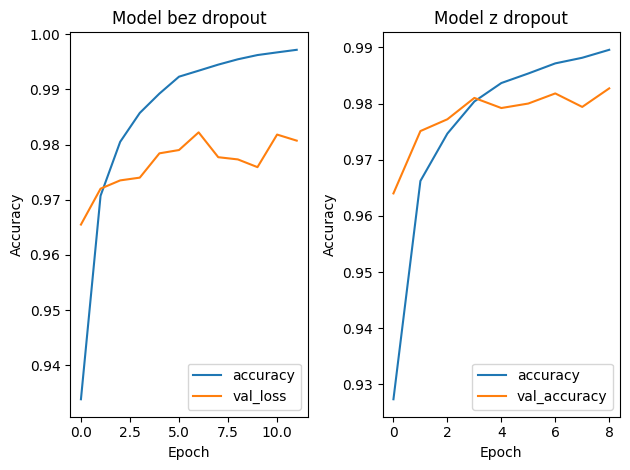

In [36]:
plt.subplot(1,2,1)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('Model bez dropout')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_drop.accuracy, label = "accuracy")
plt.plot(hist_drop.val_accuracy, label = "val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('Model z dropout')
plt.legend()

plt.tight_layout()
plt.show()